In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\anugr\Downloads\Wine_clust.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
# Checking basic details of the dataset

In [4]:
data.shape

(178, 13)

In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
# Checking for null values

In [9]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

There are no null values in the dataset

In [10]:
# Creating a dupicate file

duplic_wine = data.copy()

### Outlier Handling

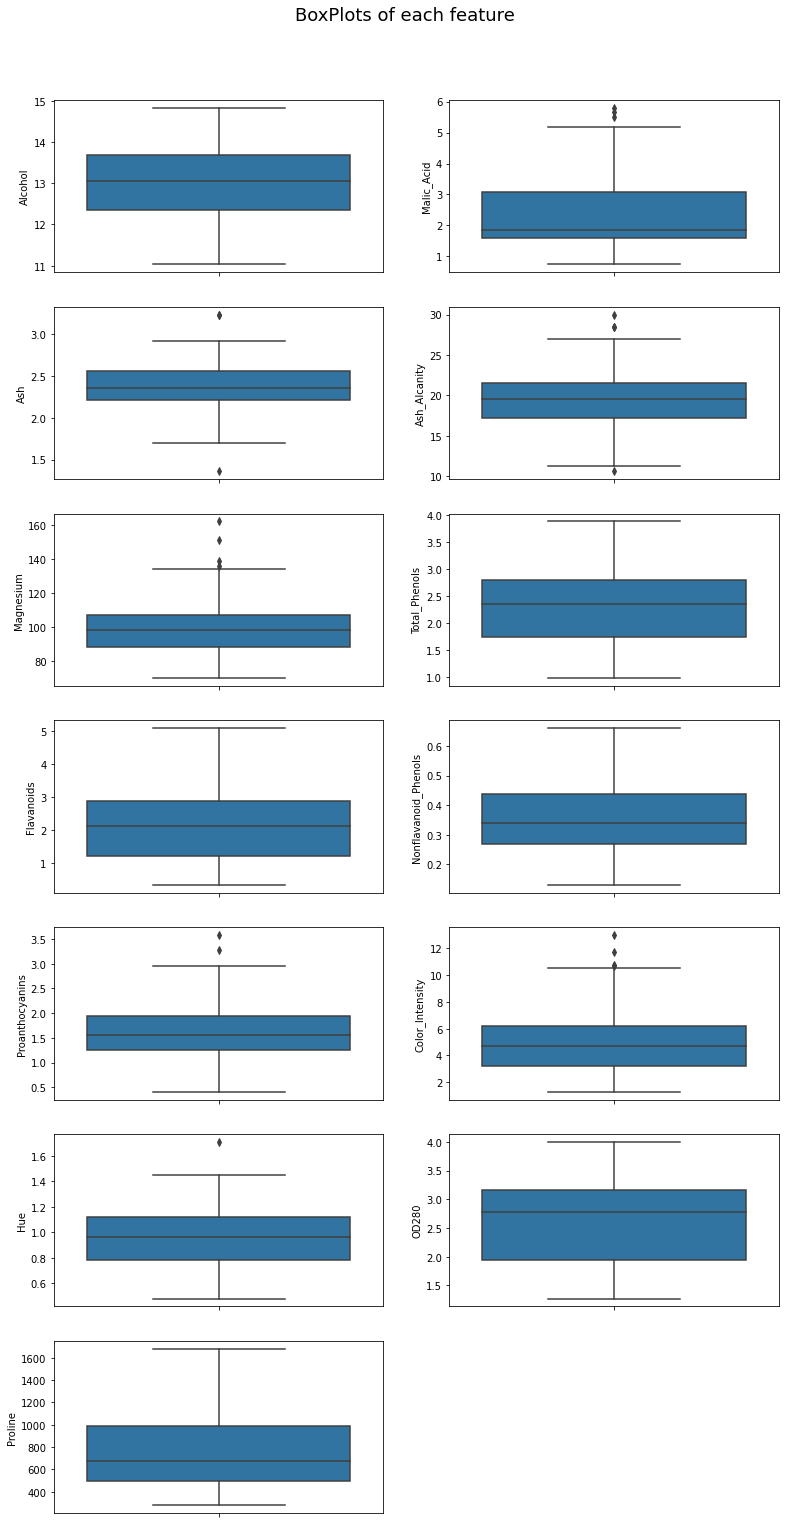

In [11]:
#Checking outliers

fig,ax= plt.subplots(figsize=(13,26))
fig.suptitle('BoxPlots of each feature', fontsize=18, y=0.93)
i=1

for column in data:
    ax1=plt.subplot(7,2,i)
    sns.boxplot(data=data, y=data[column],ax=ax1)
    i=i+1

In [12]:
## Handling outliers in Malic_Acid column

<AxesSubplot:>

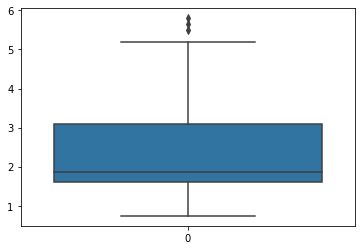

In [13]:
sns.boxplot(data = duplic_wine["Malic_Acid"])

In [14]:
#Finding outliers by IQR method
Q1 = duplic_wine["Malic_Acid"].quantile(0.25)
Q2 = duplic_wine["Malic_Acid"].quantile(0.5)
Q3 = duplic_wine["Malic_Acid"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Malic_Acid"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Malic_Acid"] > u_limit) | (duplic_wine["Malic_Acid"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  1.6025
The second quartile is :  1.8650000000000002
The third quartile is :  3.0825

The IQR is :  1.48

The upper limit =  5.3025
The lower limit =  -0.6174999999999997

The outlier values are : [5.8, 5.51, 5.65]

The outlier indexs are : Int64Index([123, 137, 173], dtype='int64')


(175, 13)

In [15]:
# Handling outliers in Ash feature

<AxesSubplot:>

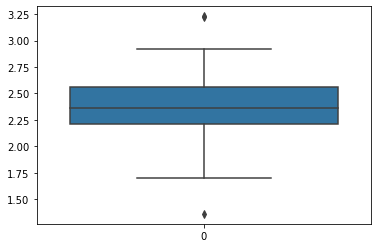

In [16]:
sns.boxplot(data = data["Ash"])

In [17]:
Q1 = duplic_wine["Ash"].quantile(0.25)
Q2 = duplic_wine["Ash"].quantile(0.5)
Q3 = duplic_wine["Ash"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Ash"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Ash"] > u_limit) | (duplic_wine["Ash"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  2.21
The second quartile is :  2.36
The third quartile is :  2.5549999999999997

The IQR is :  0.34499999999999975

The upper limit =  3.0724999999999993
The lower limit =  1.6925000000000003

The outlier values are : [3.22, 1.36, 3.23]

The outlier indexs are : Int64Index([25, 59, 121], dtype='int64')


(172, 13)

In [18]:
# Handling outliers in Ash_Alcanity feature

<AxesSubplot:>

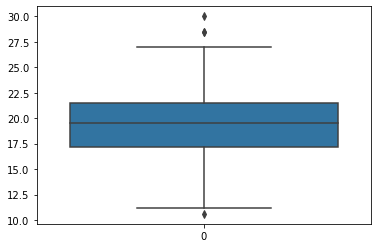

In [19]:
sns.boxplot(data = data["Ash_Alcanity"])

In [20]:
Q1 = duplic_wine["Ash_Alcanity"].quantile(0.25)
Q2 = duplic_wine["Ash_Alcanity"].quantile(0.5)
Q3 = duplic_wine["Ash_Alcanity"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Ash_Alcanity"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Ash_Alcanity"] > u_limit) | (duplic_wine["Ash_Alcanity"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape



The 1st Qaurtile is :  17.175
The second quartile is :  19.25
The third quartile is :  21.5

The IQR is :  4.324999999999999

The upper limit =  27.987499999999997
The lower limit =  10.687500000000002

The outlier values are : [30.0, 28.5]

The outlier indexs are : Int64Index([73, 127], dtype='int64')


(170, 13)

In [21]:
# Handling outliers in Magnesium feature

<AxesSubplot:>

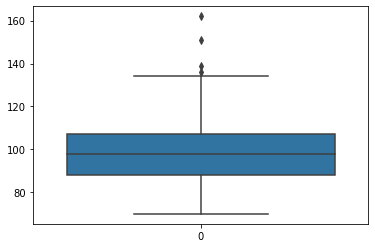

In [22]:
sns.boxplot(data = data["Magnesium"])

In [23]:
Q1 = duplic_wine["Magnesium"].quantile(0.25)
Q2 = duplic_wine["Magnesium"].quantile(0.5)
Q3 = duplic_wine["Magnesium"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Magnesium"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Magnesium"] > u_limit) | (duplic_wine["Magnesium"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  88.0
The second quartile is :  98.0
The third quartile is :  107.0

The IQR is :  19.0

The upper limit =  135.5
The lower limit =  59.5

The outlier values are : [151, 136, 162]

The outlier indexs are : Int64Index([69, 78, 95], dtype='int64')


(167, 13)

In [24]:
# Handling outliers in Proanthocyanins feature : 

<AxesSubplot:>

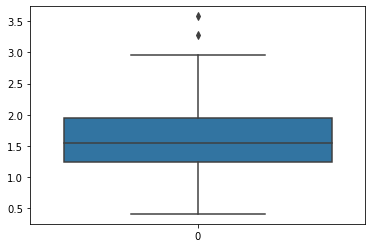

In [25]:
sns.boxplot(data = data["Proanthocyanins"])

In [26]:
Q1 = duplic_wine["Proanthocyanins"].quantile(0.25)
Q2 = duplic_wine["Proanthocyanins"].quantile(0.5)
Q3 = duplic_wine["Proanthocyanins"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Proanthocyanins"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Proanthocyanins"] > u_limit) | (duplic_wine["Proanthocyanins"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  1.25
The second quartile is :  1.54
The third quartile is :  1.9249999999999998

The IQR is :  0.6749999999999998

The upper limit =  2.9374999999999996
The lower limit =  0.23750000000000027

The outlier values are : [2.96, 3.58]

The outlier indexs are : Int64Index([14, 110], dtype='int64')


(165, 13)

In [27]:
# Handling outliers in Color_Intensity feature 

<AxesSubplot:>

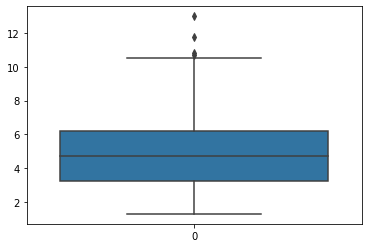

In [28]:
sns.boxplot(data = data["Color_Intensity"])

In [29]:
Q1 = duplic_wine["Color_Intensity"].quantile(0.25)
Q2 = duplic_wine["Color_Intensity"].quantile(0.5)
Q3 = duplic_wine["Color_Intensity"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Color_Intensity"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Color_Intensity"] > u_limit) | (duplic_wine["Color_Intensity"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  3.27
The second quartile is :  4.8
The third quartile is :  6.25

The IQR is :  2.98

The upper limit =  10.719999999999999
The lower limit =  -1.1999999999999997

The outlier values are : [10.8, 13.0, 11.75]

The outlier indexs are : Int64Index([151, 158, 159], dtype='int64')


(162, 13)

In [30]:
# Handling outliers in Hue feature :

<AxesSubplot:>

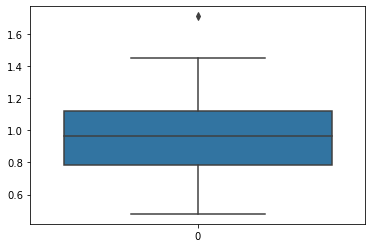

In [31]:
sns.boxplot(data = data["Hue"])

In [32]:
Q1 = duplic_wine["Hue"].quantile(0.25)
Q2 = duplic_wine["Hue"].quantile(0.5)
Q3 = duplic_wine["Hue"].quantile(0.75)

IQR = Q3 - Q1

u_limit = Q3 + 1.5 * IQR
l_limit = Q1 - 1.5 * IQR

print("The 1st Qaurtile is : ", Q1)
print("The second quartile is : ", Q2)
print("The third quartile is : ", Q3)
print("\nThe IQR is : ", IQR)
print("\nThe upper limit = ", u_limit)
print("The lower limit = ", l_limit)


outliers = []
for x in duplic_wine["Hue"]:
    if (x < l_limit) or (x > u_limit):
        outliers.append(x)

print(f"\nThe outlier values are : {outliers}")

Index = duplic_wine[(duplic_wine["Hue"] > u_limit) | (duplic_wine["Hue"] < l_limit)].index
print(f"\nThe outlier indexs are : {Index}")

duplic_wine.drop(Index, inplace=True)
duplic_wine.shape

The 1st Qaurtile is :  0.7925
The second quartile is :  0.97
The third quartile is :  1.12

The IQR is :  0.3275000000000001

The upper limit =  1.6112500000000003
The lower limit =  0.3012499999999998

The outlier values are : [1.71]

The outlier indexs are : Int64Index([115], dtype='int64')


(161, 13)

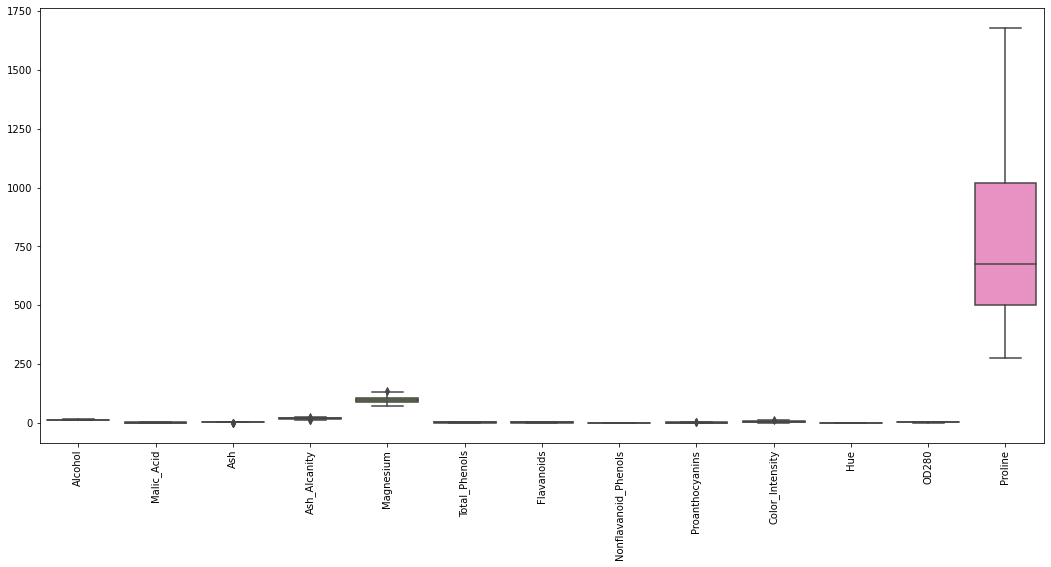

In [33]:
plt.figure(figsize=(18,8))
sns.boxplot(data= duplic_wine)
plt.xticks(rotation = 90);

Now we have treated all the outliers present in our dataset.

##### We can see that the scales are varying for different parameters, so we'll do standard scaling on dataset

In [34]:
#Standard scaling our dataset
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
data_scaled = ss.fit_transform(duplic_wine)
data_scaled =pd.DataFrame(data_scaled,columns=list(duplic_wine))


In [35]:
data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               161 non-null    float64
 1   Malic_Acid            161 non-null    float64
 2   Ash                   161 non-null    float64
 3   Ash_Alcanity          161 non-null    float64
 4   Magnesium             161 non-null    float64
 5   Total_Phenols         161 non-null    float64
 6   Flavanoids            161 non-null    float64
 7   Nonflavanoid_Phenols  161 non-null    float64
 8   Proanthocyanins       161 non-null    float64
 9   Color_Intensity       161 non-null    float64
 10  Hue                   161 non-null    float64
 11  OD280                 161 non-null    float64
 12  Proline               161 non-null    float64
dtypes: float64(13)
memory usage: 16.5 KB


In [36]:
data_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.515163,-0.579166,0.270936,-1.248144,2.298023,0.828643,1.055948,-0.650569,1.466583,0.282097,0.383333,1.828097,0.982174
1,0.209648,-0.512507,-0.931537,-2.732175,0.114047,0.589411,0.749315,-0.815257,-0.505150,-0.304357,0.429479,1.096928,0.934830
2,0.158948,0.039806,1.266087,-0.236305,0.194935,0.828643,1.239928,-0.485881,2.481732,0.300715,0.337186,0.773526,1.360929
3,1.692612,-0.350622,0.561189,-0.843409,1.165591,2.503264,1.495455,-0.979945,1.251840,1.287448,-0.447308,1.167233,2.292034
4,0.260347,0.258826,2.095379,0.573166,1.570031,0.828643,0.677767,0.255215,0.549044,-0.332284,0.383333,0.436064,-0.059401


In [37]:
data_scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02,1.610000e+02
mean,3.082420e-15,-1.130910e-16,8.936951e-16,-7.033711e-17,-2.770386e-16,1.999781e-17,-5.047722e-16,-3.020358e-16,-4.585704e-17,2.358362e-16,9.336907e-16,-8.137038e-17,-2.965192e-17
std,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00,1.003120e+00
min,-2.059161e+00,-1.502862e+00,-2.755979e+00,-2.732175e+00,-2.312593e+00,-2.074034e+00,-1.724192e+00,-1.885730e+00,-2.203572e+00,-1.747222e+00,-1.924002e+00,-1.898052e+00,-1.501825e+00
25%,-8.423697e-01,-6.743920e-01,-5.583556e-01,-7.084969e-01,-8.566089e-01,-9.257223e-01,-8.451773e-01,-7.329132e-01,-5.832379e-01,-8.209962e-01,-7.703344e-01,-8.716036e-01,-7.948163e-01
50%,4.487390e-02,-4.363261e-01,-1.931581e-02,-1.013934e-01,-4.772894e-02,6.310167e-02,1.053853e-01,-1.565048e-01,-1.147075e-01,-1.088726e-01,1.415929e-02,2.251497e-01,-2.487783e-01
75%,8.307182e-01,7.444810e-01,7.270469e-01,5.731660e-01,5.993751e-01,8.286428e-01,8.924102e-01,5.845916e-01,6.466544e-01,5.427439e-01,7.525063e-01,7.875873e-01,8.401414e-01
max,2.275658e+00,2.734712e+00,2.302702e+00,2.596844e+00,2.864239e+00,2.551110e+00,1.945184e+00,2.478505e+00,2.676953e+00,2.627916e+00,2.275347e+00,1.940584e+00,2.923292e+00


# Unsupervised Learning

## 1.Kmeans Clustering

C:\Users\anugr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


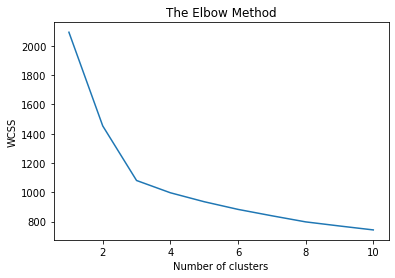

In [38]:
from sklearn.cluster import KMeans
wcss =[] #empty list to append wcss
#finding the optimum number of clusters using elbow method
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init ='k-means++', random_state =42) #kmeans++ to avoid random initialization trap
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)
#plotting number of clusters against wcss
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


In [39]:
#The elbow is at 3 , so optimum value for number of clusters is 3

In [40]:
# Creating a model with 3 optimum cluster on scaled data.
kmeans =KMeans(n_clusters =3 , init='k-means++' ,random_state=42)
y_kmeans = kmeans.fit_predict(data_scaled)

In [41]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [42]:
#Silhoutte score of kmeans clustering
from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(data_scaled, y_kmeans)

In [43]:
print("Silhouette score of kmeans_clustering is : ",sil_avg)

Silhouette score of kmeans_clustering is :  0.3013979201701521


## 2.Agglomerative Hierarchical Clustering (AHC)

#Finding the optimum number of clusters.

We'll first create a Dendrogram to find the optimum number of clusters.

In [44]:
# Dendrogram

In [45]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean distance')

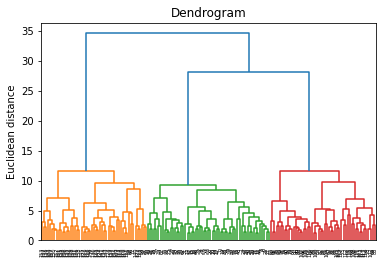

In [46]:
dendro = sch.dendrogram(sch.linkage(data_scaled , method ="ward"))
plt.title("Dendrogram")
plt.ylabel("Euclidean distance")

From the above we can take 3 as the optimum number of clusters for the Scaled data.

In [47]:
#Agglomerative clusetring
from sklearn.cluster import AgglomerativeClustering
hc =AgglomerativeClustering(n_clusters =3 , affinity = 'euclidean' , linkage ='ward')
y_hc = hc.fit_predict(data_scaled)

In [48]:
y_hc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 0, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
#Silhouette score of agglomerative clustering
sil_avg = silhouette_score(data_scaled, y_hc)
print("Silhouette score of kmeans_clustering is : ",sil_avg)

Silhouette score of kmeans_clustering is :  0.29574004115878627


## DBSCAN(Density Based Spatial Clustering of Applications with Noise)

K distance plot can be used to find the epsilon(eps) value

In [50]:
from sklearn.neighbors import NearestNeighbors


In [51]:
#min_samples >= Dimensionality of dataset,here it is 13,So the minimum value of MinPts must be at least 14.
neighbors = NearestNeighbors(n_neighbors=14)# taking min_samples as 14
neighbors_fit = neighbors.fit(data_scaled)
distances, indices = neighbors_fit.kneighbors(data_scaled)
     

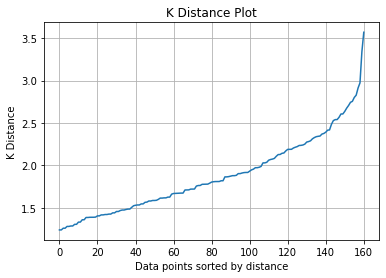

In [52]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K Distance Plot')
plt.ylabel('K Distance')
plt.xlabel('Data points sorted by distance')
plt.grid()


In [53]:
#From the graph, we can infer that elbow occuring at 3

In [54]:
from sklearn.cluster import DBSCAN

In [55]:
db=DBSCAN(eps=3,min_samples=14,metric='euclidean',algorithm='auto') 
#min_samples >= Dimensionality of dataset,here it is 13,So the minimum value of Min_samples must be at least 14.

In [56]:
y_db=db.fit_predict(data_scaled)

In [57]:
y_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0, -1,  0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  0,  0,  0, -1,
        1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

In [58]:
#Silhouette score of DBSCAN
sil_avg = silhouette_score(data_scaled, y_db)
print("Silhouette score of DBSCAN is : ",sil_avg)

Silhouette score of DBSCAN is :  0.20707089490914607


### INFERENCE:

1.For Kmeans, the silhouette score = 0.3014 for number of clusters= 3.

2.For AHC, the silhouette score =0.2957 for number of clusters =3.

3.For DBSCAN, the silhouette score =  0.207 for eps=3 and min_samples=14.